# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) DSI-5 Capstone Project: Video Games Sales Analysis and Prediction

In [1]:
import pandas as pd
import numpy as np

## 1. Reading the data

In [2]:
data = pd.read_csv('./gfinal.csv')

In [3]:
data

,Name_Console,Name,Platform,Publisher,Genre,Release_Year,Release_Month,First_Week,Total_Sales,Critic_Score,User_Score
0,.hack//G.U. Last Recode (PS4),.hack//G.U. Last Recode,PS4,Namco Bandai Games,Role-Playing,2017,11,86008.0,86008.0,NaN,NaN
1,.hack//Link (PSP),.hack//Link,PSP,Namco Bandai Games,Role-Playing,2010,3,63258.0,63258.0,NaN,NaN
2,1-2-Switch (NS),1-2-Switch,NS,Nintendo,Party,2017,3,195332.0,413302.0,4.9,NaN
3,2010 FIFA World Cup South Africa (PS3),2010 FIFA World Cup South Africa,PS3,Electronic Arts,Sports,2010,5,159986.0,481629.0,8.2,NaN
4,2010 FIFA World Cup South Africa (X360),2010 FIFA World Cup South Africa,X360,Electronic Arts,Sports,2010,5,106021.0,288574.0,8.4,NaN
5,2014 FIFA World Cup Brazil (PS3),2014 FIFA World Cup Brazil,PS3,Electronic Arts,Sports,2014,4,71704.0,229829.0,7.9,NaN
6,2014 FIFA World Cup Brazil (X360),2014 FIFA World Cup Brazil,X360,Electronic Arts,Sports,2014,4,58285.0,84430.0,7.3,NaN
7,3D Dot Game Heroes (PS3),3D Dot Game Heroes,PS3,Atlus,Role-Playing,2010,5,73619.0,172218.0,7.5,NaN
8,3rd Super Robot Wars Z Jigoku Hen (PS3),3rd Super Robot Wars Z Jigoku Hen,PS3,Namco Bandai Games,Role-Playing,2014,4,148008.0,179693.0,NaN,NaN
9,3rd Super Robot Wars Z Jigoku Hen (PSV),3rd Super Robot Wars Z Jigoku Hen,PSV,Namco Bandai Games,Role-Playing,2014,4,126941.0,126941.0,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2968 entries, 0 to 2967
Data columns (total 11 columns):
Name_Console     2968 non-null object
Name             2968 non-null object
Platform         2968 non-null object
Publisher        2968 non-null object
Genre            2968 non-null object
Release_Year     2968 non-null int64
Release_Month    2968 non-null int64
First_Week       2968 non-null float64
Total_Sales      2968 non-null float64
Critic_Score     1285 non-null float64
User_Score       109 non-null float64
dtypes: float64(4), int64(2), object(5)
memory usage: 255.1+ KB


In [5]:
data.describe()

,Release_Year,Release_Month,First_Week,Total_Sales,Critic_Score,User_Score
count,2968.000000,2968.000000,2.968000e+03,2.968000e+03,1285.000000,109.000000
mean,2011.719677,6.778639,2.231961e+05,4.258220e+05,7.757977,8.728440
std,3.684232,3.237564,5.223938e+05,9.671253e+05,1.094610,1.041197
min,2004.000000,1.000000,4.254000e+03,5.616000e+03,2.800000,3.800000
25%,2009.000000,4.000000,4.141650e+04,5.187275e+04,7.100000,8.300000
50%,2012.000000,7.000000,8.015750e+04,1.208985e+05,8.000000,9.000000
75%,2015.000000,10.000000,1.880785e+05,3.629495e+05,8.500000,9.500000
max,2018.000000,12.000000,9.705853e+06,1.436414e+07,10.000000,10.000000


In [6]:
data['Critic_Score'].unique()
#data is full of missing values. Data may be dropped depending on the model applied.

array([ nan,  4.9,  8.2,  8.4,  7.9,  7.3,  7.5,  8.1,  5.9,  7.7,  7.6,
        7. ,  9. ,  6.4,  8.3,  6.7,  6.9,  6.2,  6.1,  6. ,  6.3,  4.8,
        7.1,  8.5,  8.7,  6.6,  8. ,  6.5,  7.4,  6.8,  5. ,  8.8,  8.6,
        9.1,  7.8,  9.6,  9.5,  8.9,  9.3,  7.2,  5.4,  5.2,  9.2,  5.8,
        5.6,  5.3,  4.5,  4. , 10. ,  4.6,  4.4,  4.3,  9.4,  9.7,  5.1,
        5.5,  4.7,  2.8,  3.3])

In [7]:
data = data.set_index('Name_Console')

In [8]:
data

,Name,Platform,Publisher,Genre,Release_Year,Release_Month,First_Week,Total_Sales,Critic_Score,User_Score
Name_Console,,,,,,,,,,
.hack//G.U. Last Recode (PS4),.hack//G.U. Last Recode,PS4,Namco Bandai Games,Role-Playing,2017,11,86008.0,86008.0,NaN,NaN
.hack//Link (PSP),.hack//Link,PSP,Namco Bandai Games,Role-Playing,2010,3,63258.0,63258.0,NaN,NaN
1-2-Switch (NS),1-2-Switch,NS,Nintendo,Party,2017,3,195332.0,413302.0,4.9,NaN
2010 FIFA World Cup South Africa (PS3),2010 FIFA World Cup South Africa,PS3,Electronic Arts,Sports,2010,5,159986.0,481629.0,8.2,NaN
2010 FIFA World Cup South Africa (X360),2010 FIFA World Cup South Africa,X360,Electronic Arts,Sports,2010,5,106021.0,288574.0,8.4,NaN
2014 FIFA World Cup Brazil (PS3),2014 FIFA World Cup Brazil,PS3,Electronic Arts,Sports,2014,4,71704.0,229829.0,7.9,NaN
2014 FIFA World Cup Brazil (X360),2014 FIFA World Cup Brazil,X360,Electronic Arts,Sports,2014,4,58285.0,84430.0,7.3,NaN
3D Dot Game Heroes (PS3),3D Dot Game Heroes,PS3,Atlus,Role-Playing,2010,5,73619.0,172218.0,7.5,NaN
3rd Super Robot Wars Z Jigoku Hen (PS3),3rd Super Robot Wars Z Jigoku Hen,PS3,Namco Bandai Games,Role-Playing,2014,4,148008.0,179693.0,NaN,NaN


#### Remaining Features:  
Index: Name_Console - Combination of the game title and game platform. Same game on different platforms will be treated as different games for this analysis.
1. Name - Game title. This feature is preserved for joining purposes but will not be used in the analysis.  
2. Platform - Game platform the game is released on.  
3. Publisher - Company that published the game.  
4. Genre - Genre.  
5. Release_Year. This feature is preserved for train-test split later but will not be used in the analysis as it makes no sense to analyse year of release to predict future sales.  
6. Release_Month - Month of game release date.  
7. First_Week - Unit sales at the end of first week after release.  
8. Total_Sales - Total unit sales after 6 weeks.  
9. Critic_Score - Averaged rating scores given by game critics. This feature is 57% missing values.  
10. User_Score - Scores given by vgchartz.com users. This feature is 96% missing values, will be dropped.

#### Pre-processing data for modelling

In [9]:
#I want to preserve the 'data' DataFrame in case I want to process it differently later.
df = data.copy()

In [10]:
#Labels will be applied, '1' for Total_Sales over 1,000,000 unit sales and '0' for Total_Sales under 1,000,000 unit sales.
df['is_successful'] = df['Total_Sales'].apply(lambda x : 1 if x>1000000 else 0)

In [11]:
#'Release_Month' will be preserved as a feature, but treated as categorical values. 
df['Release_Month'] = df['Release_Month'].astype(str)

In [12]:
#Getting dummies for categorical data
df2 = pd.get_dummies(df[['Platform','Publisher','Genre','Release_Month']])

In [13]:
#Joining everything
df = pd.concat([df[['First_Week','Critic_Score','is_successful']], df2], axis=1)

In [14]:
#Standardising 'First_Week' as the values are extremely large compared to other data.
df['First_Week'] = df['First_Week'].map(lambda x : (x-df['First_Week'].mean()/df['First_Week'].std()))

In [15]:
df

,First_Week,Critic_Score,is_successful,Platform_3DS,Platform_DS,Platform_NS,Platform_PC,Platform_PS3,Platform_PS4,Platform_PSP,...,Release_Month_11,Release_Month_12,Release_Month_2,Release_Month_3,Release_Month_4,Release_Month_5,Release_Month_6,Release_Month_7,Release_Month_8,Release_Month_9
Name_Console,,,,,,,,,,,,,,,,,,,,,
.hack//G.U. Last Recode (PS4),8.600757e+04,NaN,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
.hack//Link (PSP),6.325757e+04,NaN,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1-2-Switch (NS),1.953316e+05,4.9,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2010 FIFA World Cup South Africa (PS3),1.599856e+05,8.2,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2010 FIFA World Cup South Africa (X360),1.060206e+05,8.4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2014 FIFA World Cup Brazil (PS3),7.170357e+04,7.9,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2014 FIFA World Cup Brazil (X360),5.828457e+04,7.3,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3D Dot Game Heroes (PS3),7.361857e+04,7.5,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3rd Super Robot Wars Z Jigoku Hen (PS3),1.480076e+05,NaN,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [16]:
df['Year']=data['Release_Year']

In [17]:
#Train on games released earlier than 2017, test on 2017 releases, predict on 2018 releases
train = df.loc[df['Year']<2017]
test = df.loc[df['Year']==2017]
hold = df.loc[df['Year']>2017]

In [115]:
#Defining X and y
X_train, y_train = train.drop(['is_successful','Critic_Score','Year','First_Week'],axis=1), train['is_successful']
X_test, y_test = test.drop(['is_successful','Critic_Score','Year','First_Week'],axis=1), test['is_successful']
X_hold, y_hold = hold.drop(['is_successful','Critic_Score','Year','First_Week'],axis=1), hold['is_successful']

#### Trying Logistic Regression

In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

In [117]:
lr = LogisticRegression()#class_weight = 'balanced')

scores = cross_val_score(lr, X_train, y_train, cv=5)
print("Cross-validated scores for train set:", scores)
print("Mean cross-validated score:", scores.mean())

#Fitting the model
lrmodel = lr.fit(X_train, y_train)

#Predictions/probabilities on the test dataset
y_pred = pd.DataFrame(lrmodel.predict(X_test))  
y_prob = pd.DataFrame(lrmodel.predict_proba(X_test))

lr_acc = accuracy_score(y_test, y_pred)  
lr_roc_auc = roc_auc_score(y_test, y_prob[1])
print("Accuracy for test set:",lr_acc)
print("ROC AUC Score for test set:",lr_roc_auc)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Cross-validated scores for train set: [0.89163498 0.89333333 0.87022901 0.88358779 0.89503817]
Mean cross-validated score: 0.8867646552307974
Accuracy for test set: 0.8544600938967136
ROC AUC Score for test set: 0.7741347905282332
[[179   4]
 [ 27   3]]
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       183
           1       0.43      0.10      0.16        30

   micro avg       0.85      0.85      0.85       213
   macro avg       0.65      0.54      0.54       213
weighted avg       0.81      0.85      0.81       213



C:\Users\yitaris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\yitaris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\yitaris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\yitaris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\yitaris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to

In [118]:
y_pred[0].value_counts()
#Why is Logistic Regression with class weight = 'balanced' giving ALL 1s?

0    206
1      7
Name: 0, dtype: int64

In [119]:
y_test.value_counts()

0    183
1     30
Name: is_successful, dtype: int64

In [120]:
pd.Series(lr.coef_[0], index=X_test.columns).sort_values(ascending=False)

Publisher_Nintendo                                  1.981339
Publisher_Microsoft Game Studios                    1.364251
Release_Month_11                                    1.317665
Platform_PS4                                        1.113087
Publisher_Ubisoft                                   1.084785
Publisher_Capcom                                    0.986169
Release_Month_12                                    0.985800
Publisher_Level 5                                   0.954050
Publisher_Electronic Arts                           0.944748
Publisher_NCSoft                                    0.906336
Publisher_Activision                                0.880980
Publisher_Hello Games                               0.858154
Publisher_Sony Computer Entertainment               0.827927
Publisher_GungHo                                    0.818373
Publisher_Sony Computer Entertainment America       0.765162
Genre_Role-Playing                                  0.528220
Publisher_Bethesda Softw

#### Trying Random Forest Classifier

In [121]:
from sklearn.ensemble import RandomForestClassifier 

In [122]:
rf = RandomForestClassifier(random_state=28)  

scores = cross_val_score(rf, X_train, y_train, cv=5)
print("Cross-validated scores for train set:", scores)
print("Mean cross-validated score:", scores.mean())

#Fitting the model
rfmodel = rf.fit(X_train, y_train)

#Predictions/probabilities on the test dataset
y_pred = pd.DataFrame(rfmodel.predict(X_test))  
y_prob = pd.DataFrame(rfmodel.predict_proba(X_test))

rf_acc = accuracy_score(y_test, y_pred)  
rf_roc_auc = roc_auc_score(y_test, y_prob[1])
print("Accuracy for test set:",rf_acc)
print("ROC AUC Score for test set:",rf_roc_auc)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

C:\Users\yitaris\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\yitaris\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\yitaris\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\yitaris\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Cross-validated scores for train set: [0.90684411 0.88761905 0.8110687  0.88358779 0.89312977]
Mean cross-validated score: 0.876449882724982
Accuracy for test set: 0.8779342723004695
ROC AUC Score for test set: 0.6920765027322404
[[175   8]
 [ 18  12]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       183
           1       0.60      0.40      0.48        30

   micro avg       0.88      0.88      0.88       213
   macro avg       0.75      0.68      0.71       213
weighted avg       0.86      0.88      0.87       213



C:\Users\yitaris\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\yitaris\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [123]:
y_pred[0].value_counts()

0    193
1     20
Name: 0, dtype: int64

In [124]:
y_test.value_counts()

0    183
1     30
Name: is_successful, dtype: int64

In [125]:
pd.Series(rfmodel.feature_importances_, index=X_test.columns).sort_values(ascending=False)

Release_Month_11                            0.095171
Genre_Shooter                               0.038266
Platform_PS4                                0.033136
Publisher_Nintendo                          0.033020
Publisher_Activision                        0.032143
Genre_Action                                0.032127
Release_Month_10                            0.030962
Platform_PS3                                0.029085
Publisher_Electronic Arts                   0.028664
Genre_Role-Playing                          0.026592
Publisher_Take-Two Interactive              0.025648
Publisher_Ubisoft                           0.025482
Platform_X360                               0.024844
Release_Month_9                             0.024141
Release_Month_12                            0.024047
Platform_PC                                 0.023264
Publisher_Capcom                            0.022789
Release_Month_5                             0.022671
Release_Month_2                             0.

(array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 ]),
 <a list of 6 Text xticklabel objects>)

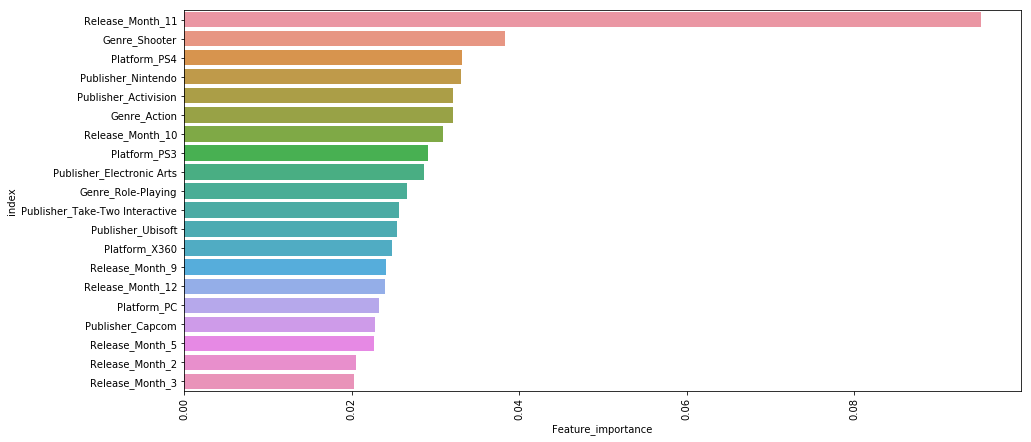

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
fig, ax = plt.subplots(figsize=(15,7))
ax = sns.barplot(y = 'index', x = 'Feature_importance', data = pd.DataFrame(columns = ['Feature_importance'], data = rfmodel.feature_importances_, index=X_test.columns).sort_values('Feature_importance', ascending=False).head(20).reset_index(), ax = ax)
plt.xticks(rotation=90)

#### Trying XGBoost

In [127]:
'''
#redefining X and y. Because XGBoost and Random Forest can handle missing values?
X_train, y_train = train.drop(['is_successful','First_Week','Year'],axis=1), train['is_successful']
X_test, y_test = test.drop(['is_successful','First_Week','Year'],axis=1), test['is_successful']
X_hold, y_hold = hold.drop(['is_successful','First_Week','Year'],axis=1), hold['is_successful']
'''

"\n#redefining X and y. Because XGBoost and Random Forest can handle missing values?\nX_train, y_train = train.drop(['is_successful','First_Week','Year'],axis=1), train['is_successful']\nX_test, y_test = test.drop(['is_successful','First_Week','Year'],axis=1), test['is_successful']\nX_hold, y_hold = hold.drop(['is_successful','First_Week','Year'],axis=1), hold['is_successful']\n"

In [128]:
from xgboost import XGBClassifier

In [129]:
xgb = XGBClassifier(random_state=28)  

scores = cross_val_score(xgb, X_train, y_train, cv=5)
print("Cross-validated scores for train set:", scores)
print("Mean cross-validated score:", scores.mean())

#Fitting the model
xgbmodel = xgb.fit(X_train, y_train)

#Predictions/probabilities on the test dataset
y_pred = pd.DataFrame(xgbmodel.predict(X_test))  
y_prob = pd.DataFrame(xgbmodel.predict_proba(X_test))

xgb_acc = accuracy_score(y_test, y_pred)  
xgb_roc_auc = roc_auc_score(y_test, y_prob[1])
print("Accuracy for test set:",xgb_acc)
print("ROC AUC Score for test set:",xgb_roc_auc)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Cross-validated scores for train set: [0.89923954 0.89714286 0.88931298 0.90076336 0.90458015]
Mean cross-validated score: 0.8982077778837422
Accuracy for test set: 0.8779342723004695
ROC AUC Score for test set: 0.7806010928961749
[[183   0]
 [ 26   4]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.93       183
           1       1.00      0.13      0.24        30

   micro avg       0.88      0.88      0.88       213
   macro avg       0.94      0.57      0.58       213
weighted avg       0.89      0.88      0.84       213



In [130]:
pd.Series(xgbmodel.feature_importances_, index=X_test.columns).sort_values(ascending=False)

Publisher_Nintendo                        0.074954
Genre_Role-Playing                        0.069470
Platform_PS4                              0.058501
Release_Month_11                          0.051188
Platform_PSP                              0.043876
Genre_Shooter                             0.042048
Publisher_Capcom                          0.040219
Platform_DS                               0.040219
Publisher_Namco Bandai Games              0.040219
Publisher_Ubisoft                         0.032907
Platform_PSV                              0.031079
Publisher_Electronic Arts                 0.031079
Platform_PC                               0.031079
Release_Month_12                          0.029250
Release_Month_10                          0.027422
Genre_Action                              0.027422
Publisher_Sega                            0.025594
Genre_Misc                                0.025594
Release_Month_4                           0.025594
Release_Month_6                

In [131]:
y_pred[0].value_counts()

0    209
1      4
Name: 0, dtype: int64

In [132]:
y_test.value_counts()

0    183
1     30
Name: is_successful, dtype: int64

In [133]:
pd.Series(xgbmodel.predict(X_train)).value_counts()

0    2552
1      71
dtype: int64

In [134]:
y_train.value_counts()

0    2351
1     272
Name: is_successful, dtype: int64

In [135]:
pd.Series(xgbmodel.predict(X_hold)).value_counts()

0    132
dtype: int64

In [136]:
y_hold.value_counts()

0    127
1      5
Name: is_successful, dtype: int64

In [137]:
#import seaborn as sns
corrlist = []
for variable in X_test.columns:
    corrlist.append((variable,(np.corrcoef(X_test[variable], y_test))[0][1]))
pd.DataFrame(corrlist,columns=['Variable','Correlation']).sort_values('Correlation', ascending = False).head(20)

C:\Users\yitaris\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3183: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\yitaris\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3184: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


,Variable,Correlation
15,Publisher_Activision,0.274945
157,Genre_Shooter,0.239868
44,Publisher_Electronic Arts,0.147282
163,Release_Month_11,0.137730
137,Publisher_Ubisoft,0.122284
97,Publisher_Nintendo,0.119597
170,Release_Month_7,0.110461
86,Publisher_Microsoft Studios,0.100519
113,Publisher_Sony Computer Entertainment,0.100519
116,Publisher_Sony Interactive Entertainment,0.076769


In [138]:
pd.DataFrame(columns = ['Feature_importance'], data = xgbmodel.feature_importances_, index=X_test.columns).sort_values('Feature_importance', ascending=False).head(20).reset_index()

,index,Feature_importance
0,Publisher_Nintendo,0.074954
1,Genre_Role-Playing,0.069470
2,Platform_PS4,0.058501
3,Release_Month_11,0.051188
4,Platform_PSP,0.043876
5,Genre_Shooter,0.042048
6,Platform_DS,0.040219
7,Publisher_Capcom,0.040219
8,Publisher_Namco Bandai Games,0.040219
9,Publisher_Ubisoft,0.032907


In [140]:
finalhold = hold.loc[(hold['Release_Month_8']==1)]

In [141]:
X_fhold, y_fhold = finalhold.drop(['is_successful','Critic_Score','Year','First_Week'],axis=1), finalhold['is_successful']

In [142]:
#Predictions/probabilities on the test dataset
fy_pred = pd.DataFrame(xgbmodel.predict(X_fhold))  
fy_prob = pd.DataFrame(xgbmodel.predict_proba(X_fhold))

fxgb_acc = accuracy_score(y_fhold, fy_pred)  
#fxgb_roc_auc = roc_auc_score(y_fhold, fy_prob[1])
print("Accuracy for test set:",fxgb_acc)
#print("ROC AUC Score for test set:",fxgb_roc_auc)
print(confusion_matrix(y_fhold, fy_pred))
print(classification_report(y_fhold, fy_pred))

Accuracy for test set: 1.0
[[20]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20

   micro avg       1.00      1.00      1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [143]:
conclusion = pd.DataFrame(y_fhold.reset_index(), columns=['Name_Console','Predicted']).head().fillna(0)

In [144]:
conclusion['Predicted']=conclusion['Predicted'].astype(int)
conclusion['Actual']=['47,922','N/A','282,353','76,546','48,754']

In [145]:
conclusion.set_index('Name_Console')

,Predicted,Actual
Name_Console,,
Dead Cells (NS),0,"47,922"
Etrian Odyssey X (3DS),0,N/A
F1 2018 (PS4),0,"282,353"
F1 2018 (XOne),0,"76,546"
Fire Pro Wrestling World (PS4),0,"48,754"


In [148]:
data['Release_Year'].value_counts()

2011    273
2013    257
2014    247
2012    246
2010    238
2009    233
2016    233
2015    224
2017    213
2007    202
2008    190
2006    159
2018    132
2005     96
2004     25
Name: Release_Year, dtype: int64

In [146]:
data.loc[data['Name']=='Minecraft']

,Name,Platform,Publisher,Genre,Release_Year,Release_Month,First_Week,Total_Sales,Critic_Score,User_Score
Name_Console,,,,,,,,,,
Minecraft (NS),Minecraft,NS,Mojang,Misc,2018,6,79772.0,353526.0,NaN,NaN
Minecraft (WiiU),Minecraft,WiiU,Microsoft Game Studios,Misc,2016,6,122612.0,253886.0,5.5,NaN
Minecraft (X360),Minecraft,X360,Microsoft Game Studios,Adventure,2013,6,151534.0,576600.0,NaN,NaN
